In [1]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit import Parameter

## Bell State's
Although there are many possible ways to create entangled Bell states through quantum circuits, the simplest takes a computational basis as the input, and contains a Hadamard gate and a CNOT gate.<br>
For the four basic two-qubit inputs: $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$, the circuit outputs the four Bell states listed below.

∣Ψ+⟩ = $\frac{∣00⟩+∣11⟩}{\sqrt{2}}$ <br><br>
∣Ψ−⟩ = $\frac{∣00⟩-∣11⟩}{\sqrt{2}}$ <br><br>
∣Φ+⟩ = $\frac{∣01⟩+∣10⟩}{\sqrt{2}}$ <br><br>
∣Φ−⟩ = $\frac{∣01⟩−∣10⟩}{\sqrt{2}}$ <br><br>

The formula: $\frac{|0y\rangle+(-1)^x|0y'\rangle}{\sqrt{2}}$ determines which bell state will be the output of the following two-qubit input $|xy\rangle$.<br> For example, the input $|00\rangle$ will return $|\psi^+\rangle$.

#### Problem 1 - Creating Bell States
---
Write a function called `apply_bell`. `apply_bell` will have three parameters `qc` the quantum circuit, `control` the control index, and `target` the target index.<br> Once the [Hadamard Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.HGate.html#qiskit.circuit.library.HGate) and [CXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html#cxgate) have been applied to the correct qubits use the [QuantumCircuit.barrier()](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.barrier) method to isolate a portion of the circuit.
<br>
<br>
If you implemented your code correctly, the quantum circuit `bell_test` should look like the circuit below.<br><br>
![bell_state.png](./imgs/bell_state.png)

In [2]:
def apply_bell(qc:QuantumCircuit, control:int, target:int):
    # YOUR CODE GOES HERE

    # Apply a hadamard gate to the control qubit

    # Apply a controlled X gate to the control and target qubits

    # Apply a barrier to qc to isolate the bell circuit during transpilation
    
    return qc

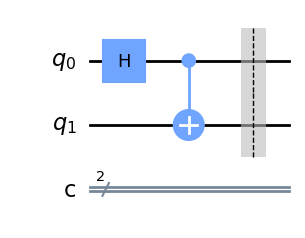

In [3]:
bell_test = QuantumCircuit(2, 2)
bell_test = apply_bell(bell_test, 0, 1)
bell_test.draw(output='mpl')

### Problem 2 - Implementing the four Bell State's

Complete the code cell below to implement all four bell states. You can use the formula $\frac{|0y\rangle+(-1)^x|0y'\rangle}{\sqrt{2}}$ to determine which input you should use.

---

For portion 1 of problem 2 implement ∣Ψ+⟩ = $\frac{∣00⟩+∣11⟩}{\sqrt{2}}$<br>

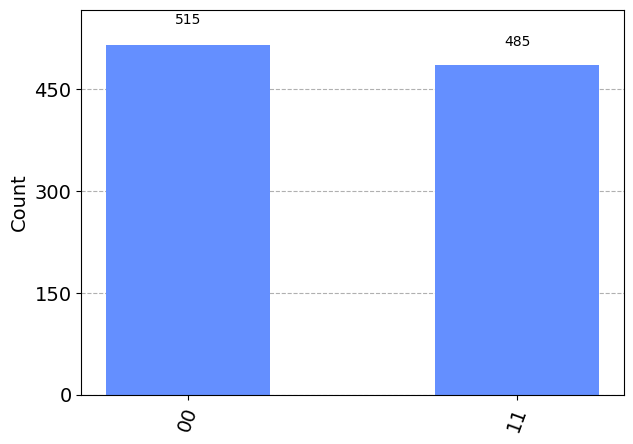

In [28]:
psi_plus = QuantumCircuit(2)
# YOUR CODE GOES HERE
# Apply XGates to the proper qubits to create the ∣Ψ+⟩ state


#YOUR CODE ENDS HERE
psi_plus = apply_bell(psi_plus, 0, 1)

psi_plus.measure_all()
job = execute(psi_plus, Aer.get_backend('qasm_simulator'), shots=1000)
plot_histogram(job.result().get_counts())

For portion 2 of problem 2 implement ∣Ψ-⟩ = $\frac{∣00⟩-∣11⟩}{\sqrt{2}}$<br>

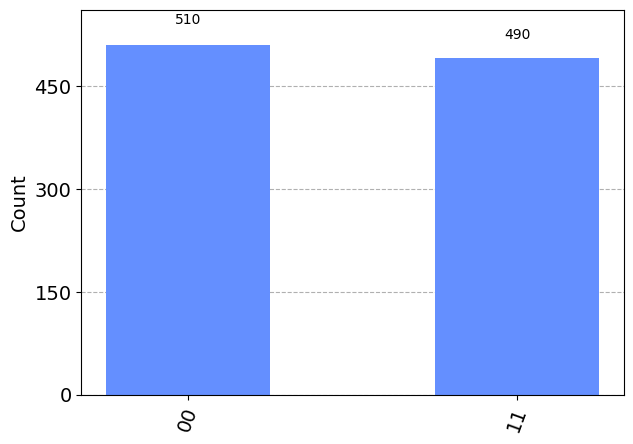

In [36]:
psi_minus = QuantumCircuit(2)
# YOUR CODE GOES HERE
# Apply XGates to the proper qubits to create the ∣Ψ-⟩ state


#YOUR CODE ENDS HERE
psi_minus = apply_bell(psi_minus, 0, 1)

psi_minus.measure_all()

job = execute(psi_minus, Aer.get_backend('qasm_simulator'), shots=1000)
plot_histogram(job.result().get_counts())

For portion 3 of problem 2 implement ∣Φ+⟩ = $\frac{∣01⟩+∣10⟩}{\sqrt{2}}$

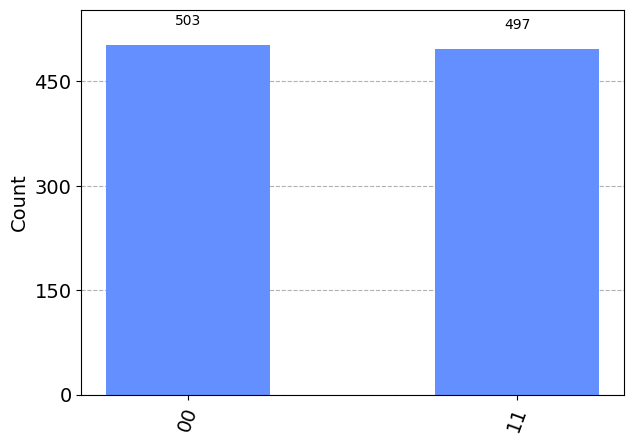

In [38]:
phi_plus = QuantumCircuit(2)
# YOUR CODE GOES HERE
# Apply XGates to the proper qubits to create the ∣Ψ-⟩ state


#YOUR CODE ENDS HERE
phi_plus = apply_bell(phi_plus, 0, 1)

phi_plus.measure_all()

job = execute(phi_plus, Aer.get_backend('qasm_simulator'), shots=1000)
plot_histogram(job.result().get_counts())

For portion 4 of problem 2 implement ∣Φ-⟩ = $\frac{∣01⟩-∣10⟩}{\sqrt{2}}$

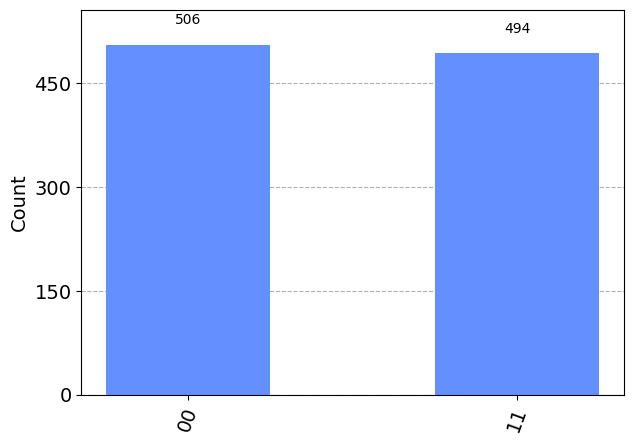

In [22]:
phi_minus = QuantumCircuit(2)
# YOUR CODE GOES HERE
# Apply XGates to the proper qubits to create the ∣Ψ-⟩ state


#YOUR CODE ENDS HERE
phi_minus = apply_bell(phi_minus, 0, 1)
phi_minus.measure_all()

job = execute(phi_minus, Aer.get_backend('qasm_simulator'), shots=1000)
plot_histogram(job.result().get_counts())

### Quantum Teleportation
---
[Video on Teleportation](https://www.youtube.com/watch?v=RukK8ZzmBik)

---
Time to test your knowledge! Use Qiskit documentation or any in-person or virtual resources available to complete the Quantum Teleportation Algorithm.
You will be able to tell that you completed it properly when the final cell displays two near identical probability distributions.
<br>
Given the quantum circuit diagram below implement Quantum Teleportation Algorithm:<br><br>
![Quantum Teleportation Circuit](./imgs/quantum_tele.png)


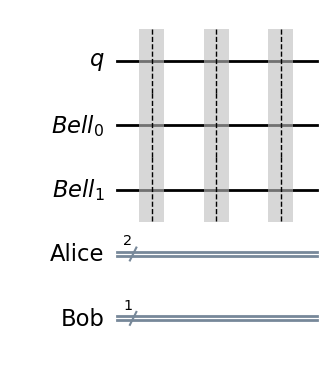

In [24]:
tele_circ = QuantumCircuit(1)
bell = QuantumRegister(2, 'Bell')
alice = ClassicalRegister(2, 'Alice')
bob = ClassicalRegister(1, 'Bob')

tele_circ.add_register(bell, alice, bob)
phase_angle = Parameter('T')

# YOUR CODE GOES HERE
# Apply RYGate with phase_angle gate to initialize the message state

tele_circ.barrier()
# Use apply_bell to create the entangled pair

# Apply Alice's gates to the message and her entangled qubit
# first CXGate the message and alice's qubit
# then hadamard the message qubit
tele_circ.barrier()
# Measure the message and alice's qubit

# Use Dynamic Circuits to apply Bob's gates to the entangled qubit
# If Alice 1 == 1, apply X gate to Bob's qubit

# If Alice 0 == 1, apply Z gate to Bob's qubit

# Measure Bob's qubit

tele_circ.barrier()

#finally we can measure Bob's qubit to recover the state

# YOUR CODE ENDS HERE
tele_circ.draw(output='mpl')


[Dynamic Circuits Explained](https://research.ibm.com/blog/quantum-dynamic-circuits)